In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv('telco custemer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Changing the data type of the total charges from objective to floats

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype ("float")


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df["customerID"].duplicated().sum()

np.int64(0)

#converting 0 and 1 value of senior citezen into yes and no to understand esaliy 

In [16]:
def conv(value):
    if value ==1:
        return"yes"
    else:
        return"no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


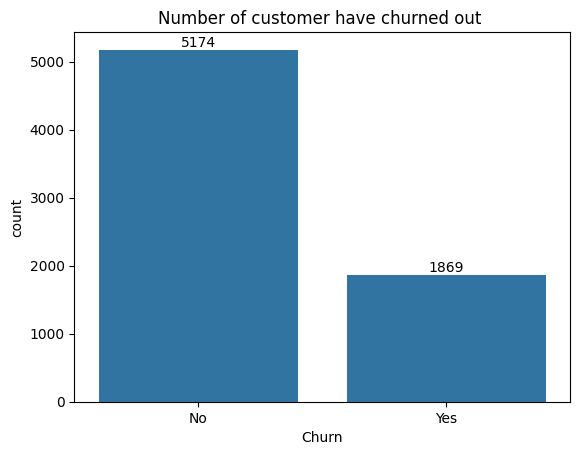

In [34]:
ax= sns.countplot(x = 'Churn',data = df)

ax.bar_label (ax.containers[0])
plt.title("Number of customer have churned out ")
plt.show()

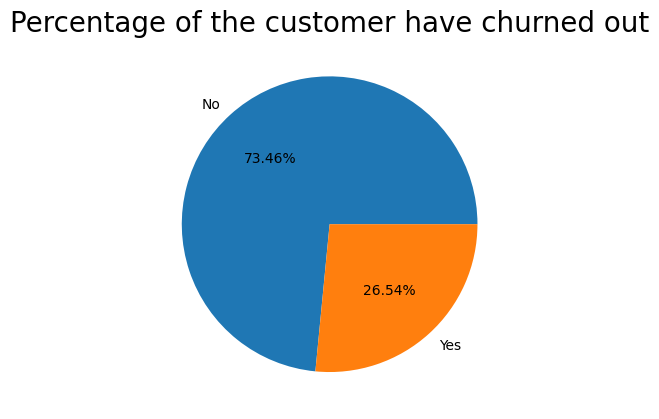

In [39]:
gb= df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of the customer have churned out",fontsize=20)
plt.show()

#percentage of the customeers have churned out 

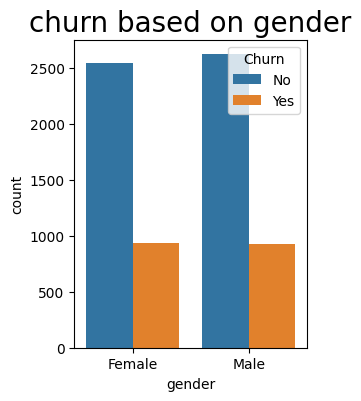

In [46]:
plt.figure(figsize=(3,4))
sns.countplot(x= "gender",data=df,hue= "Churn")
plt.title("churn based on gender",fontsize=20)
plt.show()

#in this we can conclude that there are less senior citezen and less churn but when there is senoir then the chun number are high 

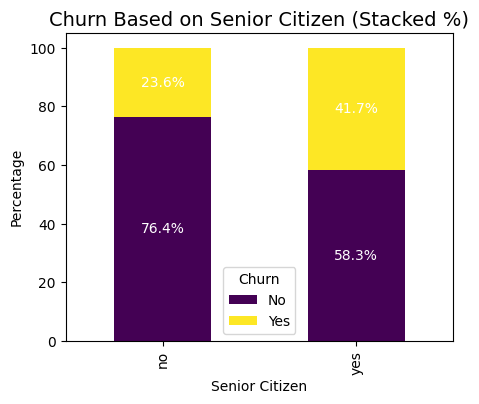

In [49]:
total = df['SeniorCitizen'].value_counts().sum()
percentages = (
    df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
    .apply(lambda x: x / x.sum() * 100, axis=1)
)

# Plotting
fig, ax = plt.subplots(figsize=(5, 4))
percentages.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

# Add percentage labels
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    label_y = y + height / 2
    percentage = f"{height:.1f}%"
    
    if height > 0:
        ax.text(x + width / 2, label_y, percentage, ha='center', va='center', fontsize=10, color='white')

# Labels and title
ax.set_title("Churn Based on Senior Citizen (Stacked %)", fontsize=14)
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Percentage")
ax.legend(title="Churn", labels=["No", "Yes"])
plt.show()


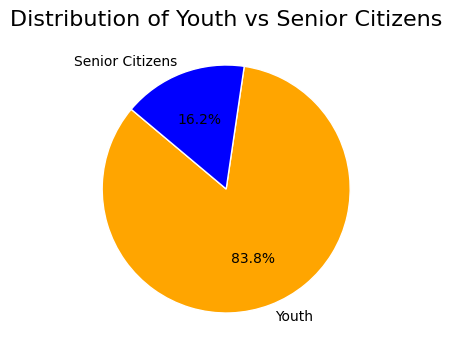

In [72]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "telco custemer churn.csv"  # Replace with the correct path to your dataset
df = pd.read_csv(file_path)

# Convert 'SeniorCitizen' column to labels
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'Youth', 1: 'Senior Citizens'})

# Count the occurrences of youth and senior citizens
senior_youth_counts = df['SeniorCitizen'].value_counts()
hue=("Churn")
# Plotting the pie chart
fig, ax = plt.subplots(figsize=(4,6))
colors = ['orange', 'blue']  # Youth = orange, Senior Citizens = blue

ax.pie(senior_youth_counts, labels=senior_youth_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
ax.set_title("Distribution of Youth vs Senior Citizens", fontsize=16)
plt.show()


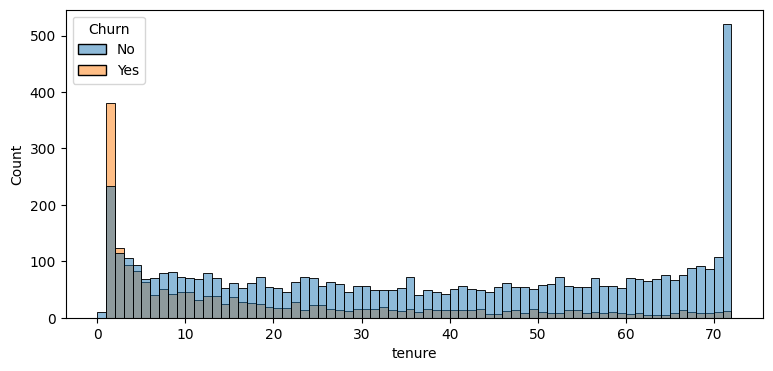

In [82]:
plt.figure(figsize =(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue = "Churn")
plt.show()

# people toke plans for long term period have lower churn rate than short term  


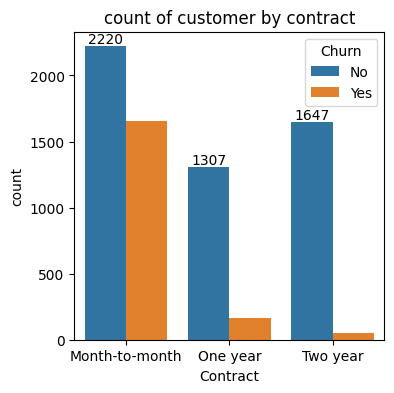

In [92]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Contract", data = df,hue ="Churn")
ax.bar_label (ax.containers[0])
plt.title("count of customer by contract")
plt.show()

# count of customer  churn by there contract

In [ ]:
customerID
 1   gender            
 2   SeniorCitizen     
 3   Partner           
 4   Dependents        
 5   tenure            
 6   PhoneService      
 7   MultipleLines     
 8   InternetService   
 9   OnlineSecurity    
 10  OnlineBackup     
 11  DeviceProtection  
 12  TechSupport      
 13  StreamingTV       
 14  StreamingMovies  
 15  Contract        
 16  PaperlessBilling  
 17  PaymentMethod     
 18  MonthlyCharges    
 19  TotalCharges   
 20  Churn       

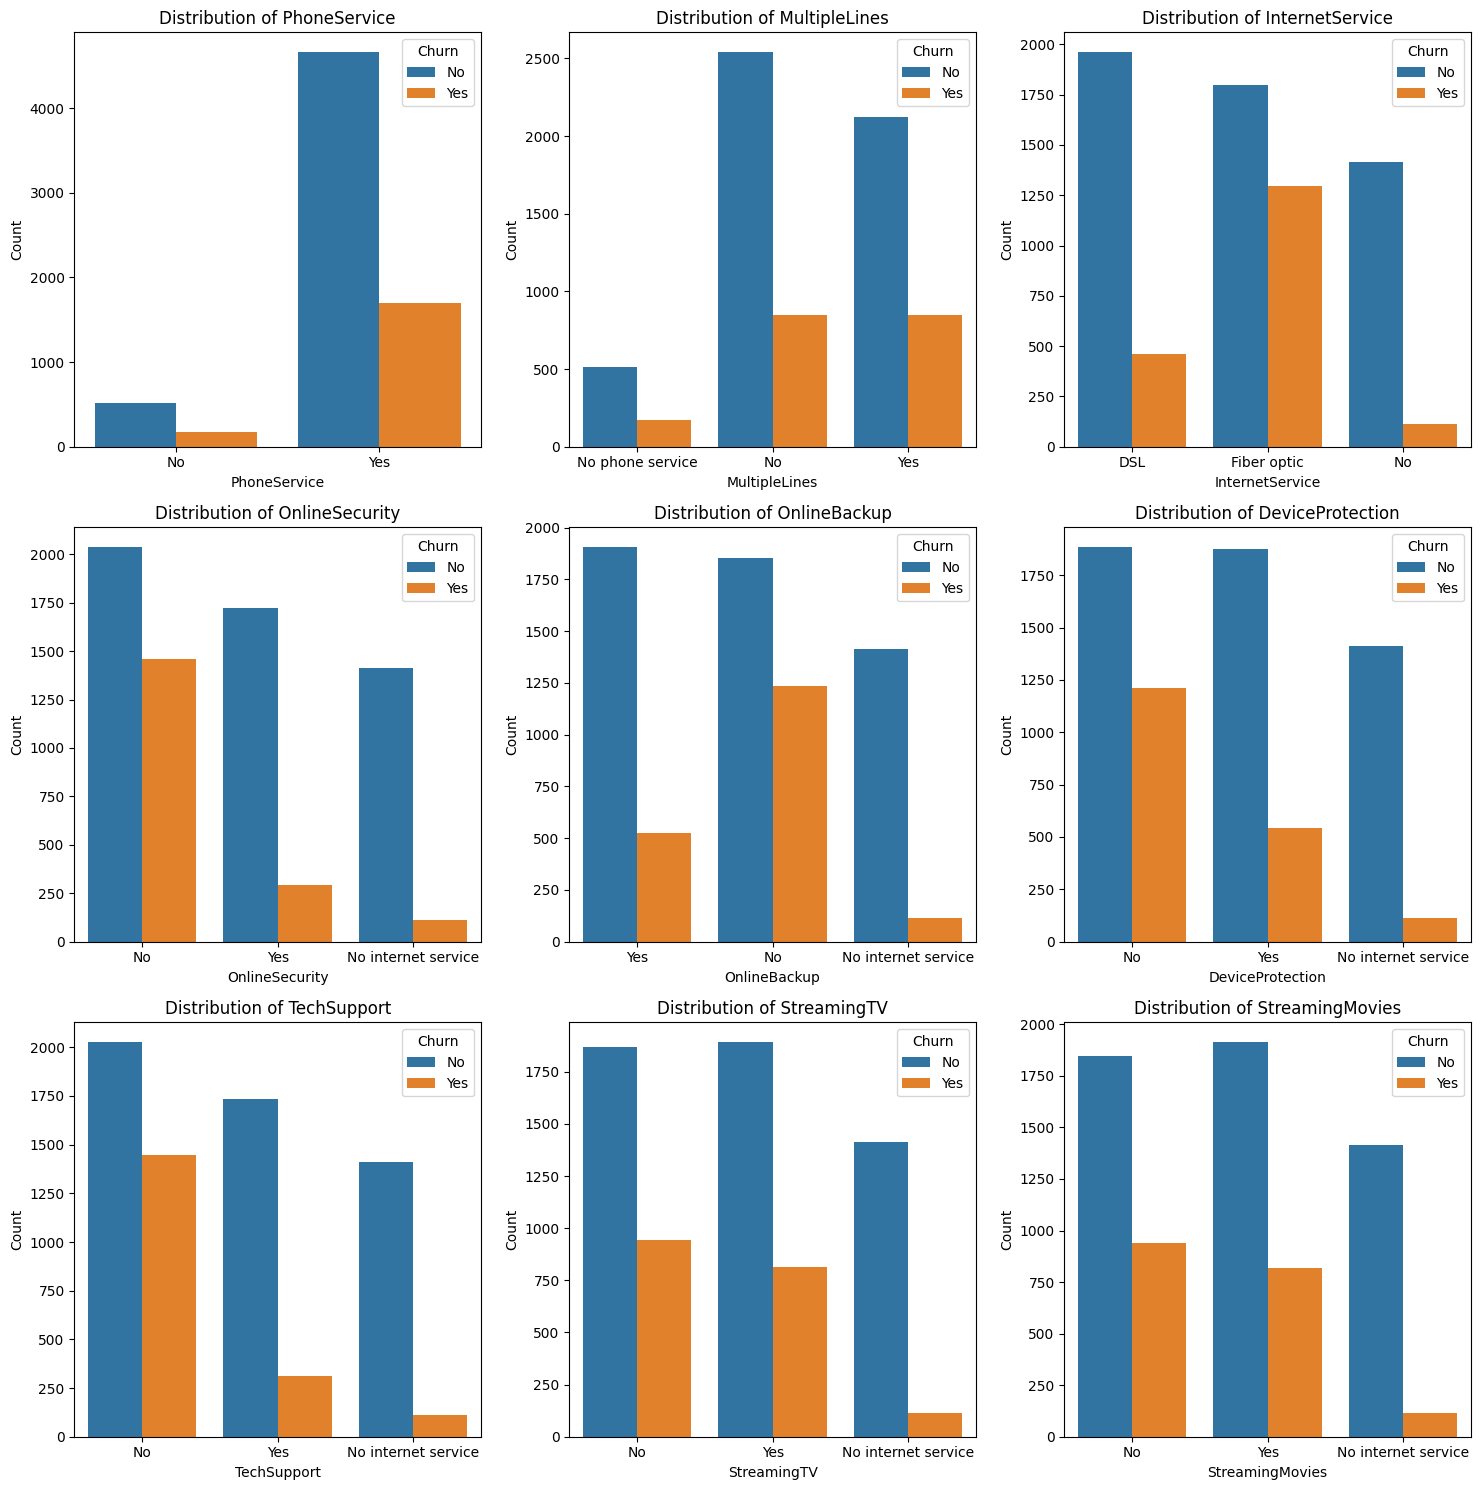

In [103]:

# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # 3x3 grid
axes = axes.flatten()  # Flatten the 2D axes array for easy iteration

# Loop through the columns and create count plots
for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


# this is the insight of the 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' the majority of the customer who do not churn are having phoneserve, internetserv and onlineserv enabled whereas techsupport and streamingtv is higher rate of churn

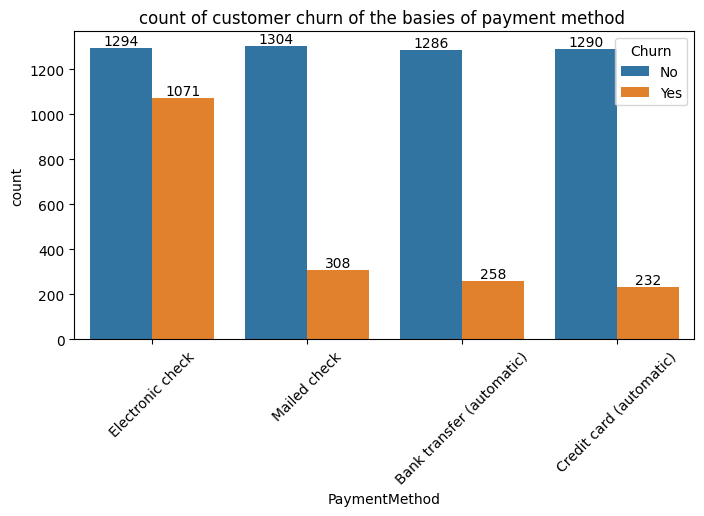

In [111]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x= "PaymentMethod",data= df, hue ="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of customer churn of the basies of payment method ")
plt.xticks(rotation=45)
plt.show()

#customers have churned when using electronic checks 

 **Insights, Summary, and Recommendations from the Telco Customer Churn Analysis**

---

 **Key Insights:**

1. **Churn Rate:**
   - The dataset shows a noticeable churn rate, with a significant portion of customers leaving the service.
   - The pie chart illustrates the churn percentage, revealing that a considerable portion of customers have ended their subscriptions.

2. **Demographic Factors:**
   - **Senior Citizens:** While they make up a smaller portion of the customer base, they have a higher churn rate compared to younger customers. 
   - **Gender:** Gender does not significantly impact churn, as both male and female customers show similar churn rates.

3. **Contract Type Influence:**
   - Customers with **long-term contracts (one-year or two-year)** have a lower churn rate.
   - **Month-to-month contracts** have a significantly higher churn rate, indicating that short-term plans are associated with higher customer attrition.

4. **Service Utilization:**
   - Customers with **Phone Service, Internet Service, and Online Security** are less likely to churn.
   - Lack of **Tech Support** and **Streaming TV services** is associated with a higher churn rate.
   - **Electronic Check payment methods** show a higher churn rate, indicating dissatisfaction with this payment method.

5. **Tenure and Churn:**
   - Customers with **shorter tenure (new customers)** have a higher churn rate.
   - Customers with longer tenure show higher retention, suggesting that customer loyalty increases over time.

6. **Payment Methods:**
   - **Electronic Check** users have a higher churn rate, while customers using **Bank Transfers and Credit Cards** have a lower churn rate.

---

 **Summary:**

- **High-risk customers** include:
  - Senior citizens.
  - Customers on month-to-month contracts.
  - Customers with no online security or tech support.
  - Electronic check payment users.
- **Low-risk customers** include:
  - Long-term contract holders.
  - Customers using bank transfers or credit card payments.
  - Those with additional services like **tech support and online security**.

---

 **Recommendations for Better Services:**

1. **Retention Strategies:**
   - Offer **discounted long-term contracts** to month-to-month customers.
   - Provide **loyalty rewards or discounts** to customers with longer tenure to reduce churn.
   - Create **personalized offers** for senior citizens to increase retention.

2. **Service Enhancements:**
   - Improve **Tech Support and Streaming TV services** as customers without these services show higher churn rates.
   - Provide **bundle offers** for phone, internet, and online security to encourage retention.

3. **Payment Method Improvements:**
   - Offer **incentives or discounts** for customers using electronic checks to switch to **bank transfers or credit card payments**, which have lower churn rates.

4. **Customer Support & Feedback:**
   - Implement a **customer feedback system** to identify service pain points.
   - Provide **proactive support** and follow-ups for customers on month-to-month contracts.

5. **Churn Prediction Model:**
   - Develop a **predictive churn model** using the existing dataset to identify high-risk customers and offer retention interventions before they leave.


